### Table of Contents

* [Certification](#certification)
* [Import Libraries](#import-libraries)
* [Square Waves](#plot-square-waves)
* [Log Amplitude Spectrum](#log-spectrum)
* [Linear Amplitude Spectrum](#linear-amplitude-spectrum)

### Certification <a class="anchor" id="certification"></a>

I certify that this project is my own work and is not the work of others. I agree not to share my solution with others. -Aaron Rodriguez

### Import Libraries <a class="anchor" id="import-libraries"></a>

In [18]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
from scipy import fftpack

In [58]:
def plotSignal(theLabel):
    fig,ax0 = plt.subplots(1,1,
                            facecolor='0.75',
                            linewidth=3,
                            edgecolor='Black')
    #Create the plot
    ax0.plot(time_vec, sig, label=theLabel)

    #Decorate the plot
    ax0.legend(loc='center left',framealpha=0.3,facecolor='Green')
    #ax0.set_ylabel('Amplitude')
    ax0.set_xlabel('Time in seconds')

    ax0.grid(True)
    ax0.xaxis.set_major_locator(ticker.MultipleLocator(20*time_step))
    ax0.xaxis.set_minor_locator(ticker.MultipleLocator(4*time_step))

    ax0.tick_params(axis='both',which='minor',length=5)
    ax0.tick_params(axis='both',which='major',color='black',
                    length=10,labelcolor='blue',width=2)
    
    ax0.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))

In [138]:
from thinkdsp import SquareSignal
freq = 220 #cycles per second (Hz)
period = 1/freq #seconds per sample

#Create 40 samples for each cycle of the square wave
time_step = period/40 #sampling interval
print('time between samples =',time_step, 'seconds')
print('samp rate =',1/time_step, 'samp per second')

#Create a time base sufficient to describe four cycles of the
# square wave with an interval of time_step.
time_vec = np.arange(0, 4*period,time_step)

#Create a square wave sampled at the times in the time base
sig1 = (np.cos(2 * np.pi * time_vec / period)) 
sig2 = (np.cos(2 * np.pi * time_vec * 3 / period))/3 
sig3 = (np.cos(2 * np.pi * time_vec * 5 / period))/5 
sig4 = (np.cos(2 * np.pi * time_vec * 7 / period))/7
sig5 = (np.cos(2 * np.pi * time_vec * 9 / period))/9
sig6 = (np.cos(2 * np.pi * time_vec * 11 / period))/11
sig7 = (np.cos(2 * np.pi * time_vec * 13 / period))/13
sig8 = (np.cos(2 * np.pi * time_vec * 15 / period))/15
sig9 = (np.cos(2 * np.pi * time_vec * 17 / period))/17
sig10 = (np.cos(2 * np.pi * time_vec * 19 / period))/19

sig = sig1-sig2+sig3-sig4+sig5-sig6+sig7-sig8+sig9-sig10

time between samples = 0.00011363636363636364 seconds
samp rate = 8800.0 samp per second


### Plot Sqaure Wave <a class="anchor" id="plot-square-waves"></a>

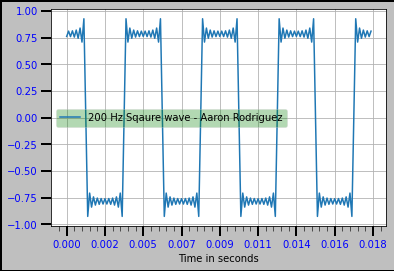

In [60]:
plotSignal('200 Hz Sqaure wave - Aaron Rodriguez')

#Save the plot to an output file.
plt.savefig('SquareWave.jpg')

#Display the plot below.
plt.show()

In [125]:
def plotLogSpectrum(theSampleFreq,theData,theLabel,theTitle):
    fig,ax0 = plt.subplots(1,1,
                            facecolor='0.75',
                            linewidth=3,
                            edgecolor='Black')
    # Select only the positive frequency values for plotting.
    pos_mask = np.where(theSampleFreq >= 0)
    freqs = theSampleFreq[pos_mask]
    pos_amp = theData[pos_mask]


    #Create the plot
    ax0.plot(freqs, pos_amp, 
             label=theLabel)

    #Decorate the plot
    ax0.legend(loc='center left',framealpha=0.3,facecolor='Green')
    
    plt.xlabel('Frequency [Hz]')
    #plt.ylabel('Log Amplitude')
    ax0.grid(True)
    freq_interval = theSampleFreq[1]
    ax0.xaxis.set_major_locator(ticker.MultipleLocator(10*freq_interval))
    ax0.xaxis.set_minor_locator(ticker.MultipleLocator(2*freq_interval))

    ax0.tick_params(axis='both',which='minor',length=5)
    ax0.tick_params(axis='both',which='major',color='black',
                    length=10,labelcolor='blue',width=2)
    ax0.set_title(theTitle)
    ax0.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax0.set_yscale('log')

In [126]:
# Perform FFT on the signal. This produces a complex spectrum.
sig_fft = fftpack.fft(sig)

# Convert the complex spectrum into an amplitude spectrum.
amplitude = np.absolute(sig_fft)

In [148]:
freq = 400 #cycles per second (Hz) for the fundamental frequency
period = 1/freq #seconds per sample for the fundamental frequency

#Create 20 samples for each cycle of the fundamental frequency
time_step = period/20 #sampling interval
print('time between samples =',time_step, 'seconds')
print('samp rate =',1/time_step, 'samp per second')

#Create a time base sufficient to describe four cycles of the
# waveform with an interval of time_step.
time_vec = np.arange(0, 4*period,time_step)

#Create a triangular wave sampled at the times in the time base
#Begin by creating the five required sinusoids at the correct
#frequencies and amplitudes.
sig1 = (np.cos(2 * np.pi * time_vec / period)) 
sig2 = (np.cos(2 * np.pi * time_vec * 3 / period))/9 
sig3 = (np.cos(2 * np.pi * time_vec * 5 / period))/25 
sig4 = (np.cos(2 * np.pi * time_vec * 7 / period))/49
sig5 = (np.cos(2 * np.pi * time_vec * 9 / period))/81

#Now add the five sinusoids together to create the triangular
#waveform.
sig = sig1 + sig2 + sig3 + sig4 + sig5


time between samples = 0.000125 seconds
samp rate = 8000.0 samp per second


### Log Amplitude Spectrum <a class="anchor" id="log-spectrum"></a>

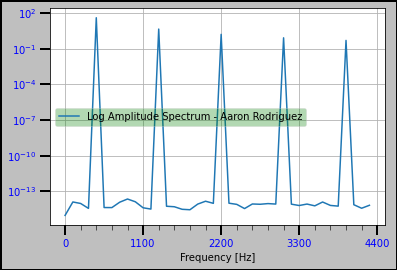

In [149]:
plotLogSpectrum(sample_freq,amplitude,'Log Amplitude Spectrum - Aaron Rodriguez','')

#Save the plot to an output file.
plt.savefig('LogSpectrum.jpg')

#Display the plot below.
plt.show()

In [166]:
def plotSpectrum(theSampleFreq,theData,theLabel,theTitle):
    fig,ax0 = plt.subplots(1,1,
                            facecolor='0.75',
                            linewidth=3,
                            edgecolor='Black')
    # Select only the positive frequency values for plotting.
    pos_mask = np.where(theSampleFreq >= 0)
    freqs = theSampleFreq[pos_mask]
    pos_amp = theData[pos_mask]


    #Create the plot
    ax0.plot(freqs, pos_amp, 
             label=theLabel)

    #Decorate the plot
    ax0.legend(loc='upper right',framealpha=0.3,facecolor='Green')
    
    plt.xlabel('Frequency [Hz]')
    #plt.ylabel('Amplitude')
    ax0.grid(True)
    freq_interval = theSampleFreq[1]
    ax0.xaxis.set_major_locator(ticker.MultipleLocator(10*freq_interval))
    ax0.xaxis.set_minor_locator(ticker.MultipleLocator(2*freq_interval))

    ax0.tick_params(axis='both',which='minor',length=5)
    ax0.tick_params(axis='both',which='major',color='black',
                    length=10,labelcolor='blue',width=2)
    ax0.set_title(theTitle)
    ax0.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

### Linear Amplitude Spectrum <a class="anchor" id="linear-amplitude-spectrum"></a>

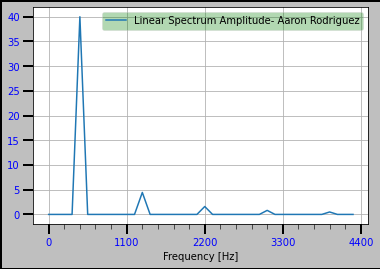

In [167]:
plotSpectrum(sample_freq,amplitude, 'Linear Spectrum Amplitude- Aaron Rodriguez','')

#Save the plot to an output file.
plt.savefig('LinearSpectrum.jpg')

#Display the plot below.
plt.show()

In [163]:
 # The End #